In [39]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point, Polygon

In [19]:
nyc = gpd.read_file("Community Districts.geojson")
nyc

,boro_cd,shape_area,shape_leng,geometry
0,404,65739662.4022,37018.3738616,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
1,304,56662612.6779,37007.8065279,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
2,303,79461502.2788,36213.671066,"MULTIPOLYGON (((-73.91805 40.68721, -73.91800 ..."
3,308,45603786.6961,38232.8870882,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
4,112,77964539.6922,54703.2247465,"MULTIPOLYGON (((-73.93445 40.83598, -73.93464 ..."
...,...,...,...,...
66,108,55215029.0484,53753.3536506,"MULTIPOLYGON (((-73.94180 40.76905, -73.94257 ..."
67,401,171492784.147,91164.8804751,"MULTIPOLYGON (((-73.90647 40.79018, -73.90251 ..."
68,480,32777561.5747,47338.740527,"MULTIPOLYGON (((-73.86272 40.76667, -73.86281 ..."
69,110,39086308.251,35869.9827014,"MULTIPOLYGON (((-73.93445 40.83598, -73.93447 ..."


In [20]:
nyc['boro_cd'] = nyc['boro_cd'].astype('int')

In [21]:
df = pd.read_csv('2015StreetTreesCensus_TREES.csv')
# merged = nyc.merge(df, left_on='boro_cd', right_on='ID',how='inner')
df

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25,0,OnCurb,Alive,Good,Quercus palustris,...,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.636255
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7,0,OnCurb,Alive,Good,Cladrastis kentukea,...,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.647547
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12,0,OnCurb,Alive,Good,Acer rubrum,...,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.076270
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9,0,OnCurb,Alive,Good,Acer rubrum,...,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.950653


In [27]:
df_new = df.loc[:,['Latitude','longitude','zipcode']]
df_new

,Latitude,longitude,zipcode
0,40.723092,-73.844215,11375
1,40.794111,-73.818679,11357
2,40.717581,-73.936608,11211
3,40.713537,-73.934456,11211
4,40.666778,-73.975979,11215
...,...,...,...
683783,40.713211,-73.954944,11211
683784,40.715194,-73.856650,11375
683785,40.620762,-74.136517,10314
683786,40.850828,-73.903115,10457


In [14]:
df.columns

Index(['created_at', 'tree_id', 'block_id', 'the_geom', 'tree_dbh',
       'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trnk_wire', 'trnk_light', 'trnk_other',
       'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'Latitude',
       'longitude', 'x_sp', 'y_sp'],
      dtype='object')

In [28]:
df_new.to_csv('sliced_trees.csv')

In [77]:
zip_sum['count'] = df_new['zipcode'].value_counts()
zip_sum_df = pd.DataFrame(zip_sum)

In [86]:
zip_sum_df['ZIPCODE'] = zip_sum_df.index

In [95]:
zip_sum_df

,zipcode,ZIPCODE
10312,22186,10312
10314,16905,10314
10306,13030,10306
10309,12650,10309
11234,11253,11234
...,...,...
10048,12,10048
11451,12,11451
11096,9,11096
10115,7,10115


In [67]:
#zipcode shape file
zips = gpd.read_file('zipcode_files/ZIP_CODE_040114.shp')
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)

In [96]:
Viz = zips.merge(zip_sum_df, left_on='ZIPCODE', right_on='ZIPCODE')


NameError: ignored

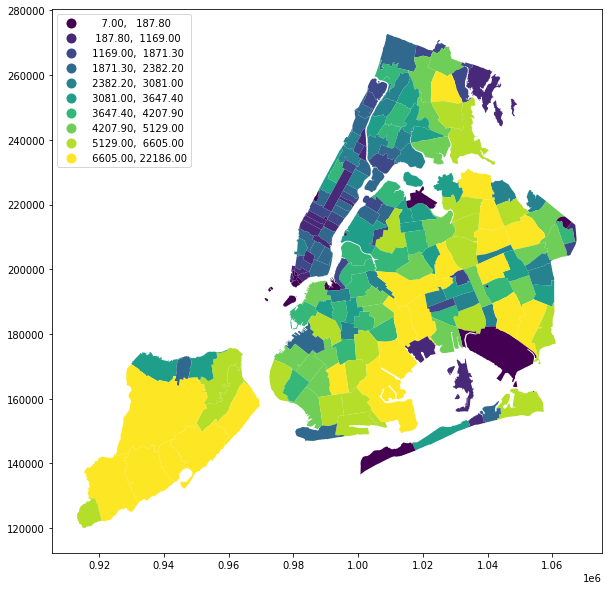

In [102]:
Viz.plot(figsize=(10,10),column='zipcode', k=10, scheme='Quantiles', legend=True, 
                 legend_kwds={'loc': 'upper left'})

In [117]:
Zip_Pop = zips[['ZIPCODE','POPULATION']].groupby('ZIPCODE').sum()
# Zip_Pop

new_merge_df = pd.merge(zip_sum_df,Zip_Pop,left_index=True, right_index=True)
new_merge_df = new_merge_df[new_merge_df['POPULATION']>=100]
new_merge_df

,zipcode,ZIPCODE,POPULATION
10312,22186,10312,58506.0
10314,16905,10314,85430.0
10306,13030,10306,55602.0
10309,12650,10309,33114.0
11234,11253,11234,85853.0
...,...,...,...
11109,92,11109,2752.0
10281,72,10281,4017.0
10006,53,10006,3011.0
11697,30,11697,4079.0


In [118]:
 
#Normalize crime rate by population
new_merge_df['norm'] = (new_merge_df['zipcode']/new_merge_df['POPULATION'])*100000
S22_Zip_df = new_merge_df.reset_index()
S22_Zip_df.head()

,index,zipcode,ZIPCODE,POPULATION,norm
0,10312,22186,10312,58506.0,37920.897002
1,10314,16905,10314,85430.0,19788.130633
2,10306,13030,10306,55602.0,23434.408834
3,10309,12650,10309,33114.0,38201.364982
4,11234,11253,11234,85853.0,13107.288039


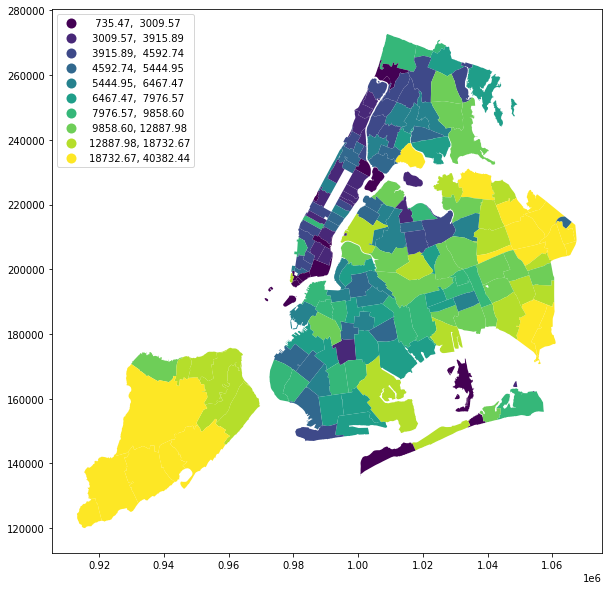

In [120]:
Viz = zips.merge(S22_Zip_df, left_on='ZIPCODE', right_on='ZIPCODE')
Viz.plot(figsize=(10,10),column='norm', k=10, scheme='Quantiles', legend=True, 
                 legend_kwds={'loc': 'upper left'})

In [126]:
S22_Zip_df.rename(columns={'norm':'Normalized_Tree_Count'}, inplace=True)

In [127]:
final_df = S22_Zip_df.loc[:,['ZIPCODE','Normalized_Tree_Count']]
final_df

,ZIPCODE,Normalized_Tree_Count
0,10312,37920.897002
1,10314,19788.130633
2,10306,23434.408834
3,10309,38201.364982
4,11234,13107.288039
...,...,...
177,11109,3343.023256
178,10281,1792.382375
179,10006,1760.212554
180,11697,735.474381


In [128]:
final_df.to_csv('final_tree_file.csv')